<h3 style='color:orange' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this notebook we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [3]:
df = pd.read_csv("Data_TelcoCustChurn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,No
1421,5357-TZHPP,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.40,732.5,Yes
2803,1985-MBRYP,Female,0,No,No,43,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.65,779.25,No
2532,9825-YCXWZ,Female,1,No,No,41,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),101.10,4016.2,No
4575,8746-OQQRW,Male,0,No,No,4,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.25,101.9,No


**First of all, drop customerID column as it is of no use**

In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[1082].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1 = df1.copy()
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors="coerce")


In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(7032,))

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

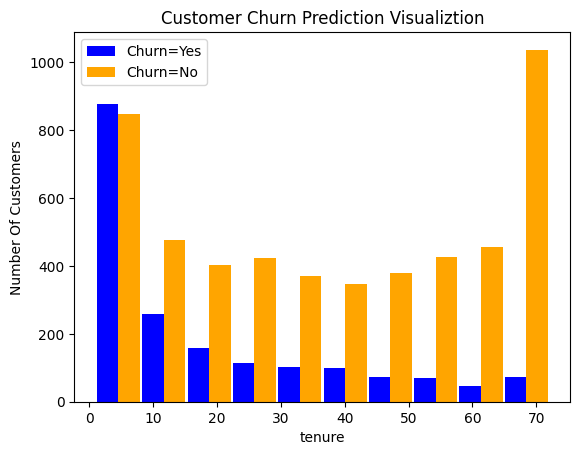

In [21]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

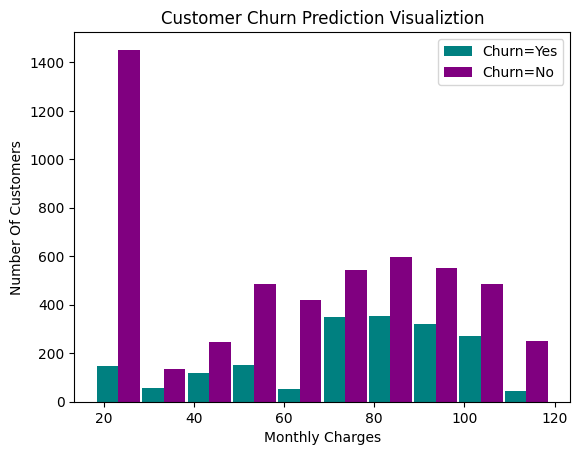

In [35]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['teal','purple'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [24]:
df1["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [25]:
cat_cols = df1.select_dtypes(include=["object", "string", "bool"]).columns
df1[cat_cols].nunique(dropna=False).sort_values()

gender              2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64

In [26]:
def print_unique_col_values(df, max_unique=50):
    cat_cols = df1.select_dtypes(include=["object", "string", "bool"]).columns
    for col in cat_cols:
        uniq = df[col].dropna().unique()
        if len(uniq) <= max_unique:
            print(f"{col} ({len(uniq)}): {uniq}")
        else:
            print(f"{col} ({len(uniq)}): too many to display")


In [27]:
print_unique_col_values(df1)

gender (2): ['Female' 'Male']
Partner (2): ['Yes' 'No']
Dependents (2): ['No' 'Yes']
PhoneService (2): ['No' 'Yes']
MultipleLines (3): ['No phone service' 'No' 'Yes']
InternetService (3): ['DSL' 'Fiber optic' 'No']
OnlineSecurity (3): ['No' 'Yes' 'No internet service']
OnlineBackup (3): ['Yes' 'No' 'No internet service']
DeviceProtection (3): ['No' 'Yes' 'No internet service']
TechSupport (3): ['No' 'Yes' 'No internet service']
StreamingTV (3): ['No' 'Yes' 'No internet service']
StreamingMovies (3): ['No' 'Yes' 'No internet service']
Contract (3): ['Month-to-month' 'One year' 'Two year']
PaperlessBilling (2): ['Yes' 'No']
PaymentMethod (4): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn (2): ['No' 'Yes']


**Some of the columns have no internet service or no phone service, keeping them as it is**

In [28]:
#df1.replace('No internet service','No',inplace=True)
#df1.replace('No phone service','No',inplace=True)

In [29]:
print_unique_col_values(df1)

gender (2): ['Female' 'Male']
Partner (2): ['Yes' 'No']
Dependents (2): ['No' 'Yes']
PhoneService (2): ['No' 'Yes']
MultipleLines (3): ['No phone service' 'No' 'Yes']
InternetService (3): ['DSL' 'Fiber optic' 'No']
OnlineSecurity (3): ['No' 'Yes' 'No internet service']
OnlineBackup (3): ['Yes' 'No' 'No internet service']
DeviceProtection (3): ['No' 'Yes' 'No internet service']
TechSupport (3): ['No' 'Yes' 'No internet service']
StreamingTV (3): ['No' 'Yes' 'No internet service']
StreamingMovies (3): ['No' 'Yes' 'No internet service']
Contract (3): ['Month-to-month' 'One year' 'Two year']
PaperlessBilling (2): ['Yes' 'No']
PaymentMethod (4): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn (2): ['No' 'Yes']


In [30]:
print(cat_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [31]:
print(df1.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### Target Variable Spliting and Train/Test splitting

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

y = df1["Churn"].map({"No": 0, "Yes": 1}).astype("int32").values
X = df1.drop(columns=["Churn"])

cat_cols = X.select_dtypes(include=["object", "string", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=87, stratify=y
)

#Adding class weights
# y_train is 0/1 already
cw = compute_class_weight(class_weight="balanced",
                          classes=np.array([0, 1]),
                          y=y_train)

class_weight = {0: float(cw[0]), 1: float(cw[1])}
print("class_weight:", class_weight)



class_weight: {0: 0.6809927360774818, 1: 1.8812709030100334}


In [56]:
# Softened class weights

w0, w1 = class_weight[0], class_weight[1]
# i tried three alpha values 0.25, 0.5, 0.75
# as my goal is “catch churners” ---> alpha = 0.75
#  is best (highest recall + highest churn F1)
alpha = 0.75  # 0 = no weighting, 1 = full balanced weighting
class_weight_soft = {0: 1 + alpha*(w0 - 1),
                     1: 1 + alpha*(w1 - 1)}

print("soft weights:", class_weight_soft)


soft weights: {0: 0.7607445520581113, 1: 1.660953177257525}


### Data Preprocessing (OHE + scaling)

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# use of handle_unknown="ignore": we might get a category that wasn’t seen during fitting
# With "ignore", it won’t error. Instead, it outputs all zeros for that feature’s one-hot columns for that row
# By default, one-hot encoding can return a sparse matrix (memory-efficient, lots of zeros).
# with Setting: sparse_output=False makes it return a dense NumPy array instead (a normal 2D array)
# Newer sklearn: sparse_output=False
# Older sklearn: use sparse=False

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

X_train_p = preprocess.fit_transform(X_train)
X_test_p  = preprocess.transform(X_test)

input_dim = X_train_p.shape[1]
print("Input features after OHE:", input_dim)

Input features after OHE: 45


### Building a model (ANN) in tensorflow/keras

In [52]:
# to install
%pip install -q -U pip
%pip install -q -U tensorflow keras



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# to ensure right datatypes
X_train_tf = X_train_p.astype("float32")
X_test_tf  = X_test_p.astype("float32")
y_train_tf = y_train.astype("float32")
y_test_tf  = y_test.astype("float32")

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

#trying to use a stratified validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_tf, y_train_tf, test_size=0.2, random_state=87, stratify=y_train
)

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=32,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    class_weight=class_weight_soft,
    verbose=1
)

# patience=5: if the validation metric (by default val_loss)
# doesn’t improve for 5 consecutive epochs, stop.

print("Test eval:", model.evaluate(X_test_tf, y_test_tf))


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7569 - auc: 0.7884 - loss: 0.5540 - val_accuracy: 0.7822 - val_auc: 0.8360 - val_loss: 0.4613
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7580 - auc: 0.8351 - loss: 0.4957 - val_accuracy: 0.7760 - val_auc: 0.8421 - val_loss: 0.4600
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7636 - auc: 0.8409 - loss: 0.4876 - val_accuracy: 0.7698 - val_auc: 0.8418 - val_loss: 0.4670
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7702 - auc: 0.8444 - loss: 0.4825 - val_accuracy: 0.7867 - val_auc: 0.8424 - val_loss: 0.4497
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7704 - auc: 0.8459 - loss: 0.4802 - val_accuracy: 0.7680 - val_auc: 0.8420 - val_loss: 0.4735
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7729 - auc: 0.8473 - loss: 0.4782 - val_accuracy: 0.7484 - val_auc: 0.8432 - val_loss: 0.4899
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━

### Evaluation

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

y_prob = model.predict(X_test_tf).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC :", average_precision_score(y_test, y_prob))  # very useful for imbalance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
ROC-AUC: 0.8482536198497704
PR-AUC : 0.6644926381437526
[[850 183]
 [111 263]]
              precision    recall  f1-score   support

           0      0.884     0.823     0.853      1033
           1      0.590     0.703     0.641       374

    accuracy                          0.791      1407
   macro avg      0.737     0.763     0.747      1407
weighted avg      0.806     0.791     0.796      1407



### confusion matrix heatmap

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


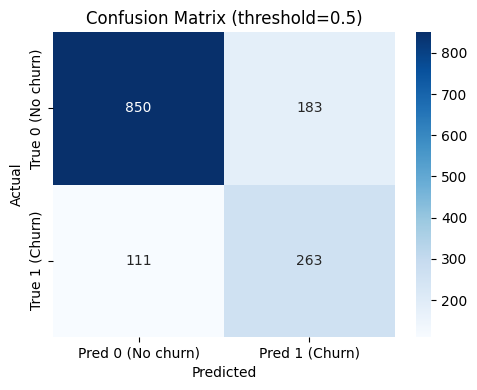

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predict
y_prob = model.predict(X_test_tf).ravel()
thr = 0.5  # change later if you choose
y_pred = (y_prob >= thr).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0 (No churn)", "Pred 1 (Churn)"],
            yticklabels=["True 0 (No churn)", "True 1 (Churn)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (threshold={thr})")
plt.tight_layout()
plt.show()


Note:
1. As AUC is often more informative than accuracy for churn, i used AUC over accuracy
2. Considering offers or not too expensive, so i prefer Recall to predict more churner
3. In future or for any other case-study we can tune class_weight_soft and threshold value as per goal

### Note (Final Test Performance)

This ANN churn model uses one-hot encoding for categorical features and standard scaling for numeric features, trained with softened class weights (alpha=0.75). Performance on the held-out test set at threshold = 0.50:

- ROC–AUC: 0.848  
- PR–AUC: 0.664  
- Accuracy: 0.791  

Churn class (1) metrics:
- Precision: 0.590  
- Recall: 0.703  
- F1-score: 0.641  

Confusion matrix [[TN, FP], [FN, TP]]:
[[850, 183],
 [111, 263]]

Interpretation: The model captures ~70% of churners (high recall) with some false positives; the decision threshold can be tuned to trade precision vs recall depending on retention budget and campaign capacity.


### Final Model Performance (Test Set) showing both classes


**Model/Preprocessing:** ANN classifier trained on one-hot encoded categorical variables + standardized numeric features; softened class weights (alpha=0.75).  
**Decision threshold:** 0.50.

**Overall metrics (test set):**
- ROC–AUC: 0.848  
- PR–AUC: 0.664  
- Accuracy: 0.791  

**Per-class metrics (test set):**

| Class | Meaning   | Precision | Recall | F1-score | Support |
|------:|-----------|----------:|-------:|---------:|--------:|
| 0     | No Churn  | 0.884     | 0.823  | 0.853    | 1033    |
| 1     | Churn     | 0.590     | 0.703  | 0.641    | 374     |

**Confusion matrix** `[[TN, FP], [FN, TP]]`:
`[[850, 183], [111, 263]]`

Comment: Threshold tuning can be used to increase precision (fewer false positives) or increase recall (catch more churners), depending on business costs.
